In [44]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np

#### What is Seaborn?

- A Python data visualization library based on Matplotlib.
Provides a high-level interface for creating attractive and informative statistical graphics

- In Seaborn, plots are generally categorized into two types: Figure-level plots and Axes-level plots.
    - **Figure-level plots** in Seaborn manage the entire figure, including the layout of subplots if there are multiple. They create a figure and one or more subplots, handling aspects like titles, legend placement, and overall aesthetics.
    
        Examples:

        -  sns.catplot()
        -  sns.pairplot()
        -  sns.relplot()
        -  sns.lmplot()
        -  sns.clustermap()

    - Customization:

        - These plots are more powerful for complex visualizations where you might need to create a grid of plots based on different categories. 
        - Figure-level plots come with built-in options for managing the entire figure, such as adding titles across all subplots or adjusting the layout.

    - When to use:

        - Use Figure-level plots when you need to create multiple subplots (like a grid of scatter plots for different categories) or when you want to take advantage of Seaborn’s automatic handling of figure-level elements.

    
    - **Axes-level plots** are the most common type of plot in Seaborn. These plots are built directly on top of Matplotlib's Axes object. This means each plot is tied to a single set of x and y axes.

        Examples:

        -  sns.scatterplot()
        -  sns.lineplot()
        -  sns.barplot()
        -  sns.boxplot()
        -  sns.histplot()

    - Customization:
        - You can customize these plots using Matplotlib functions because they directly use the Axes object.
            For example, you can add titles, labels, or even multiple plots on the same axes.

    - When to use:
    
        - Use Axes-level plots when you want to create a single plot or manually manage subplots.

## datasets

In [8]:
tips = sns.load_dataset('tips')

titanic = sns.load_dataset('titanic')

gap = px.data.gapminder()   

## Relational plots

     used in bivariant analysis


- relplot

- scatterplot

- lineplot

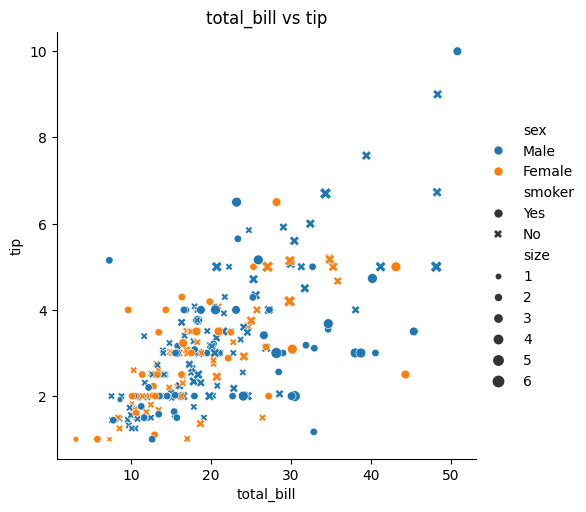

In [17]:
# relplot->scatter (figure level plot)

sns.relplot(data=tips,x='total_bill',y='tip',hue='sex',kind='scatter',style='smoker',size='size')
plt.title('total_bill vs tip')
plt.show()



<Axes: xlabel='total_bill', ylabel='tip'>

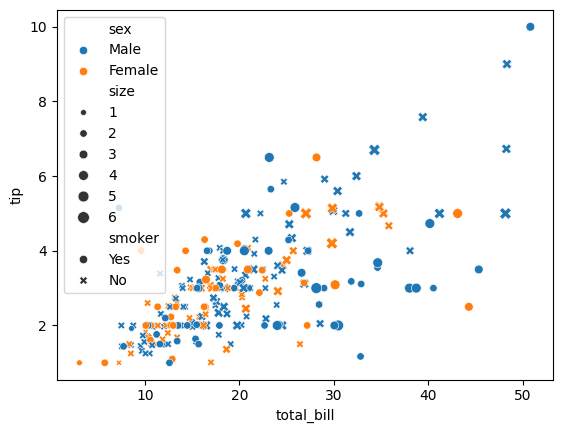

In [25]:
# scatterplot

sns.scatterplot(data=tips,x='total_bill',y='tip',hue='sex',style='smoker',size='size')


In [27]:
gap.sample(3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
750,Ireland,Europe,1982,73.100,3480000,12618.321410,IRL,372
1519,Tanzania,Africa,1987,51.535,23040630,831.822079,TZA,834
240,Canada,Americas,1952,68.750,14785584,11367.161120,CAN,124


In [31]:
gap['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

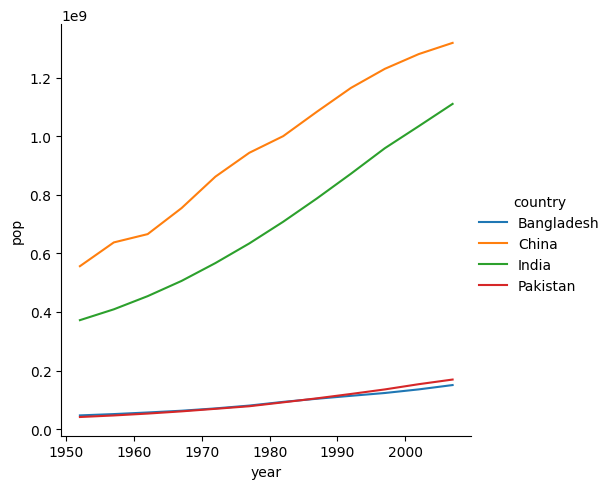

In [40]:
aux_df = gap[gap['country'].isin(['India','China','Pakistan','Bangladesh'])]

sns.relplot(kind='line',data=aux_df,x='year',y='pop',hue='country')

<Axes: xlabel='year', ylabel='pop'>

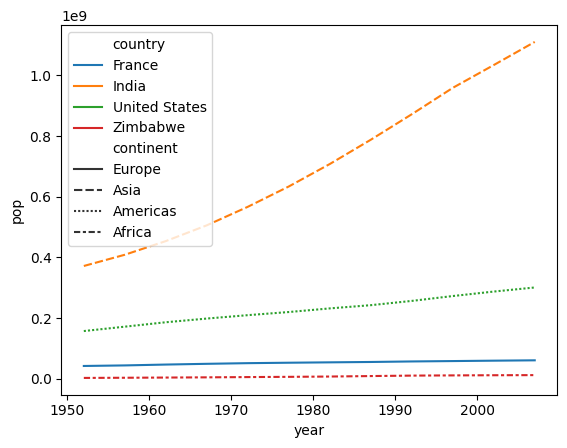

In [43]:
con_df = gap[gap['country'].isin(['India','Zimbabwe','France','United States'])]
sns.lineplot(data=con_df,x='year',y='pop',hue='country',style='continent')

<Figure size 400x400 with 0 Axes>

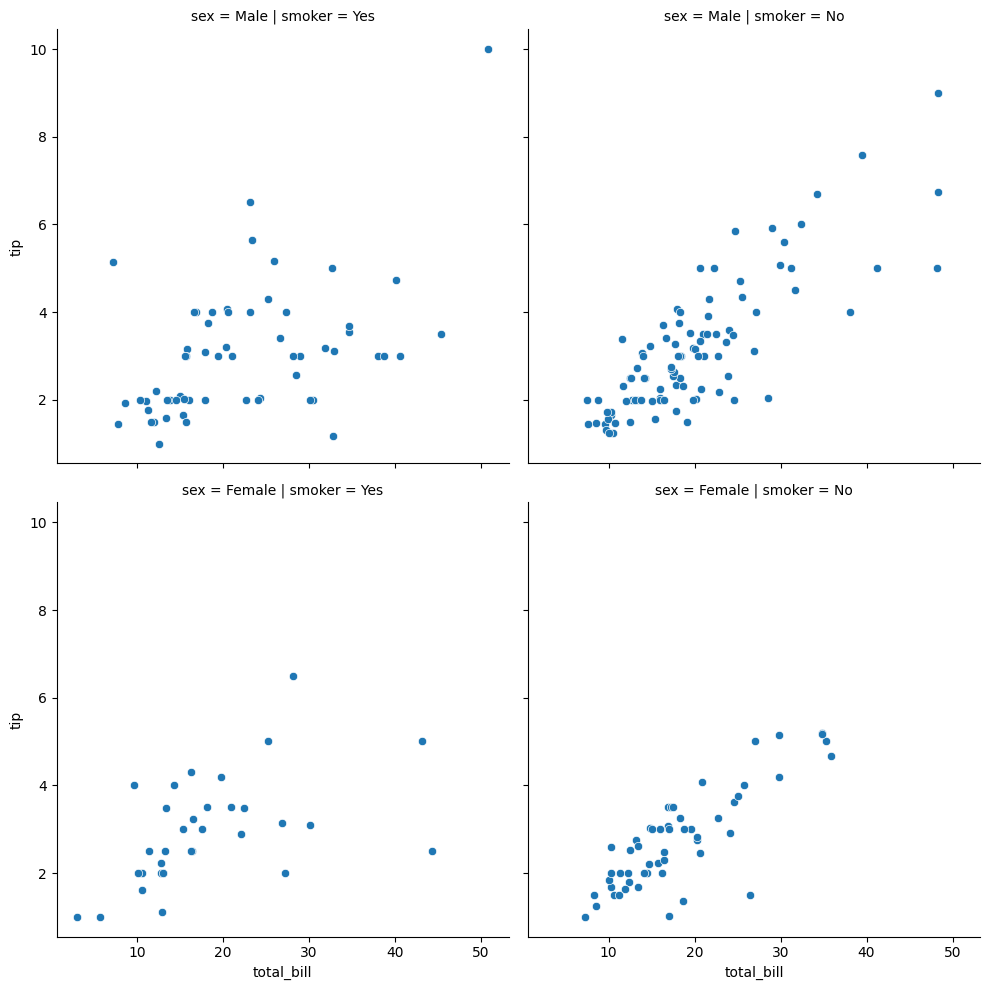

In [53]:
#facetplot : allows you to create a grid of plots based on subsets of your data. 
# It lets you split your data into rows and columns, 
# and then apply a plotting function to each subset.

# works only on fig level plots not on axes level 

#row and col


sns.relplot(data=tips,kind='scatter',x='total_bill',y='tip',row='sex',col='smoker')

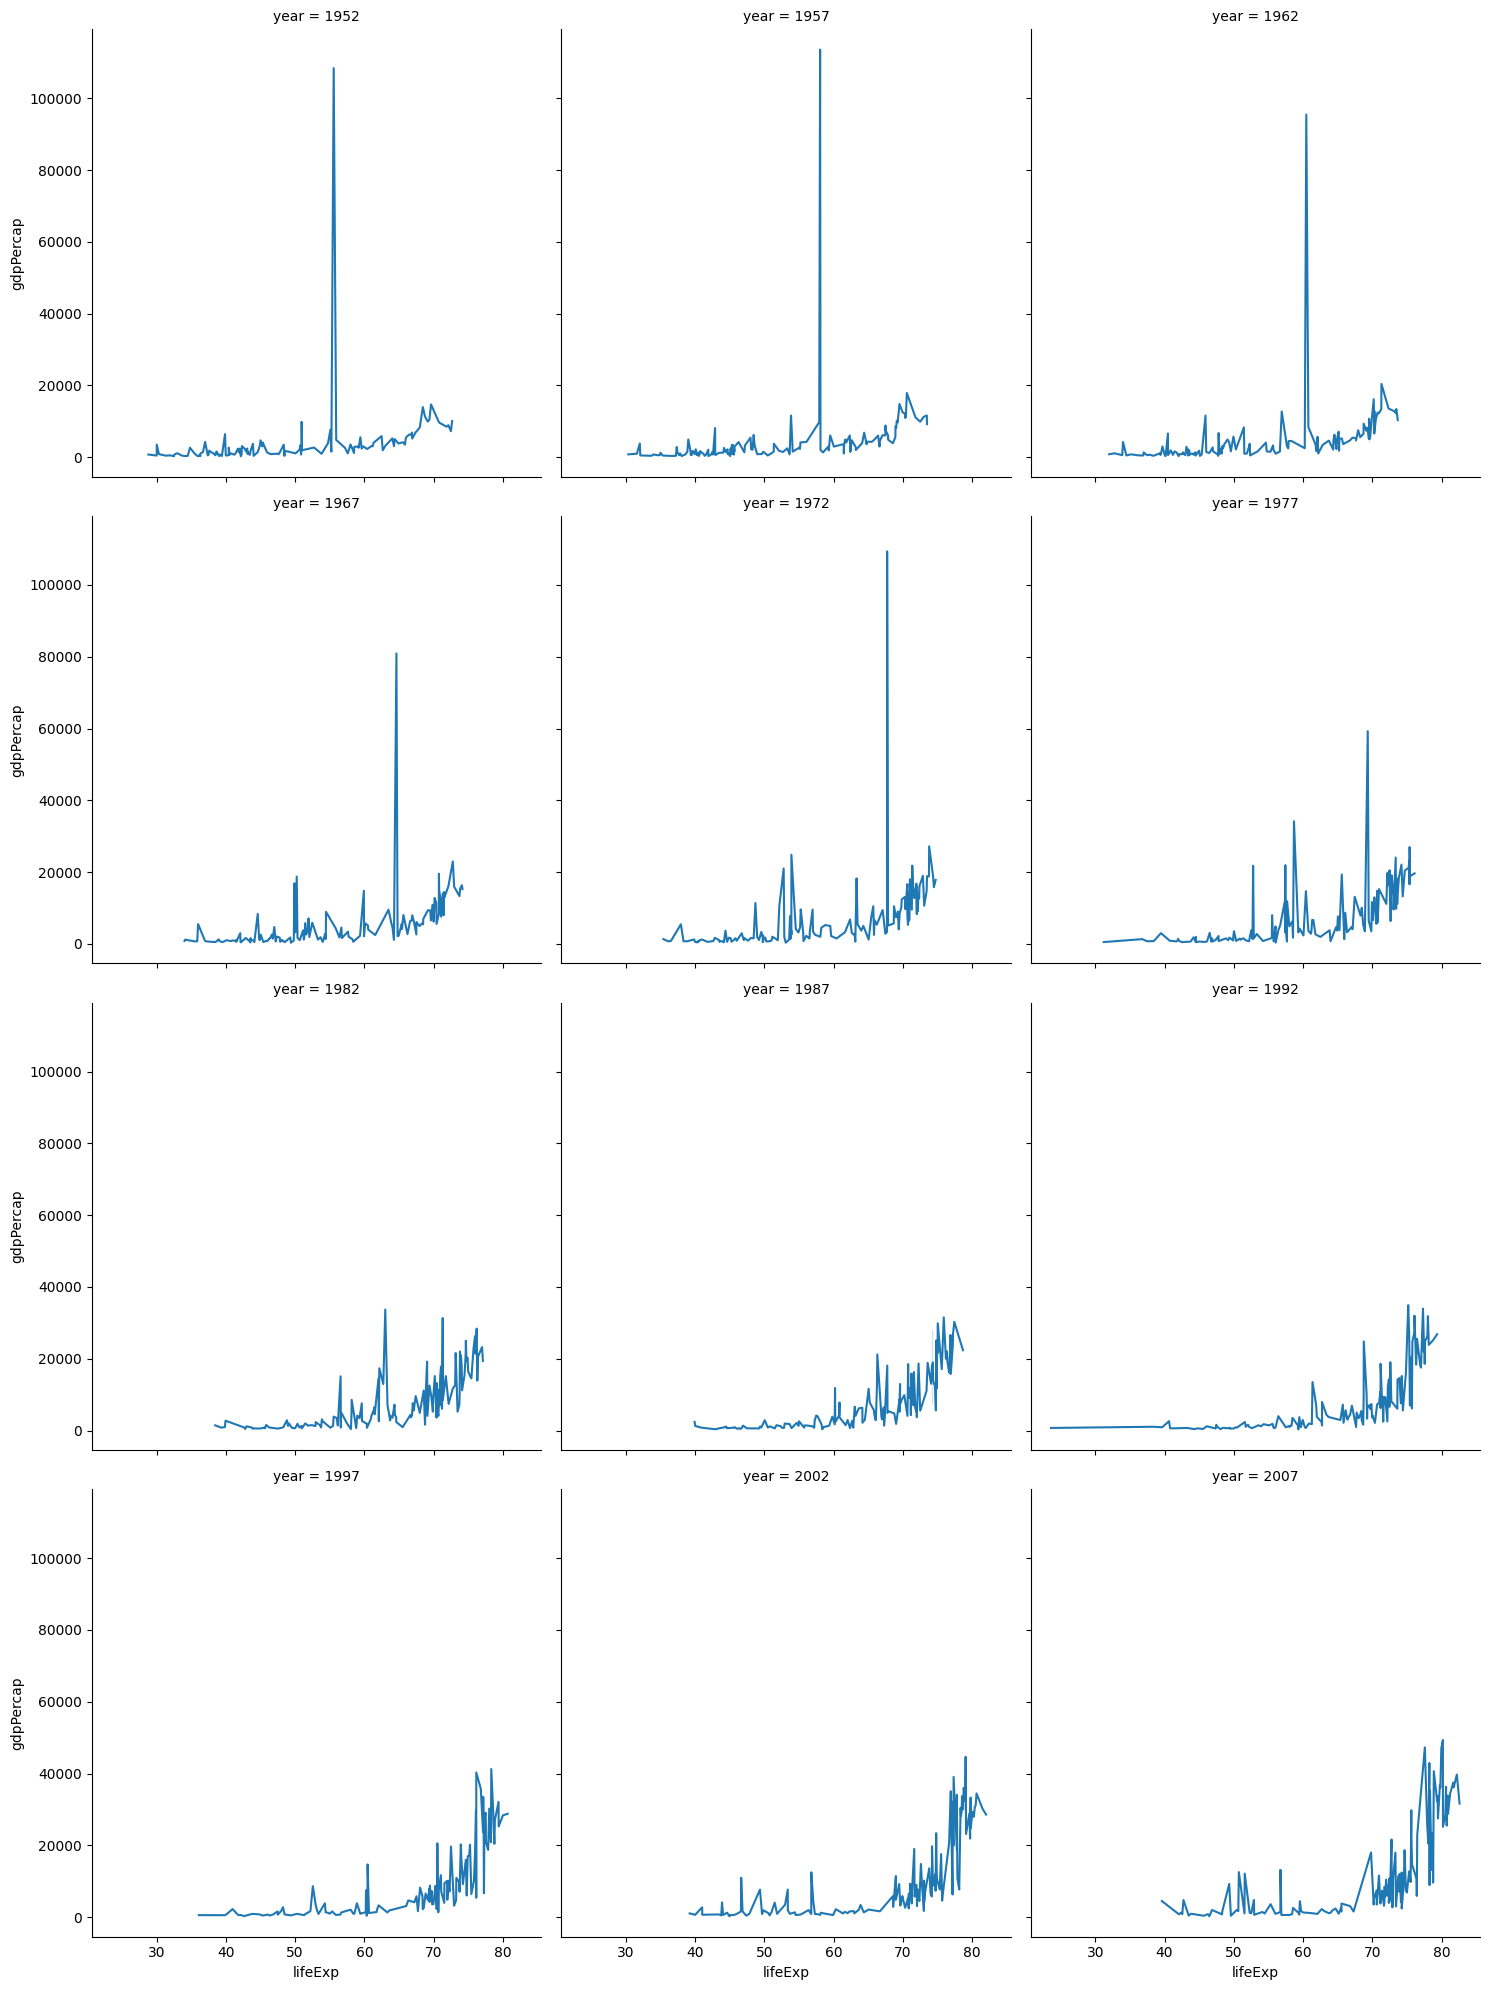

In [64]:
sns.relplot(data=gap,kind='line',x='lifeExp',y='gdpPercap',col='year',col_wrap=3)

## Distribution plots

- used in univariant analysis
- gives info about
* central tendancy
* range of data
* distribution of data
----------------------------------
- displot
- histplot
- kdeplot
- rugplot


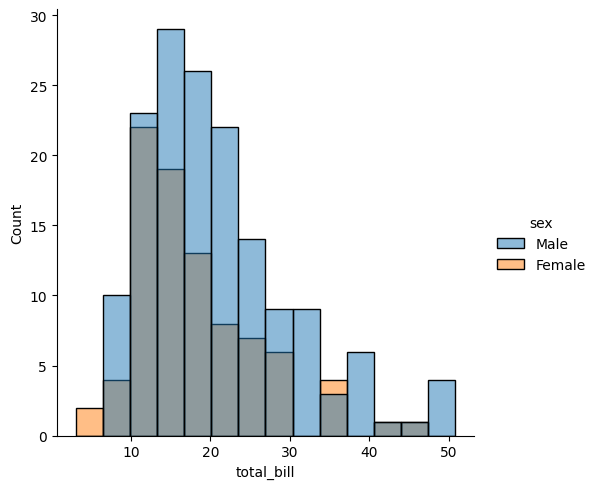

In [86]:
# displot (fig level function)

sns.displot(kind='hist',data=tips,x=tips['total_bill'],hue='sex')

#### A histogram is a graphical representation that organizes a group of data points into user-specified ranges (bins). It provides a visual interpretation of the distribution, central tendency, and variability of the data.

**Key Features:**
- Displays the frequency of data points within specified bins.
- Helps identify the shape of the data distribution (e.g., normal, skewed).
- Useful for comparing distributions across different categories.

<Axes: xlabel='age', ylabel='Count'>

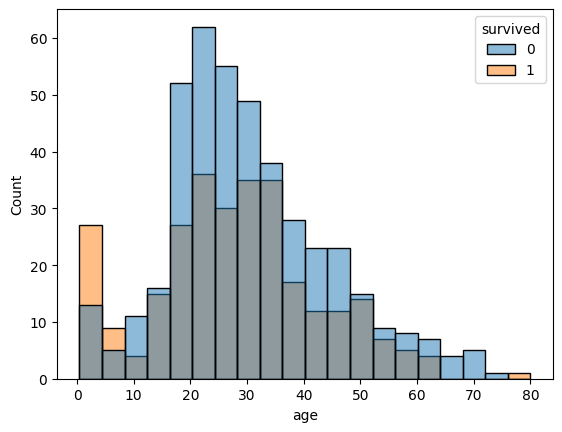

In [87]:
sns.histplot(data=titanic,x='age',hue='survived')

In [88]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

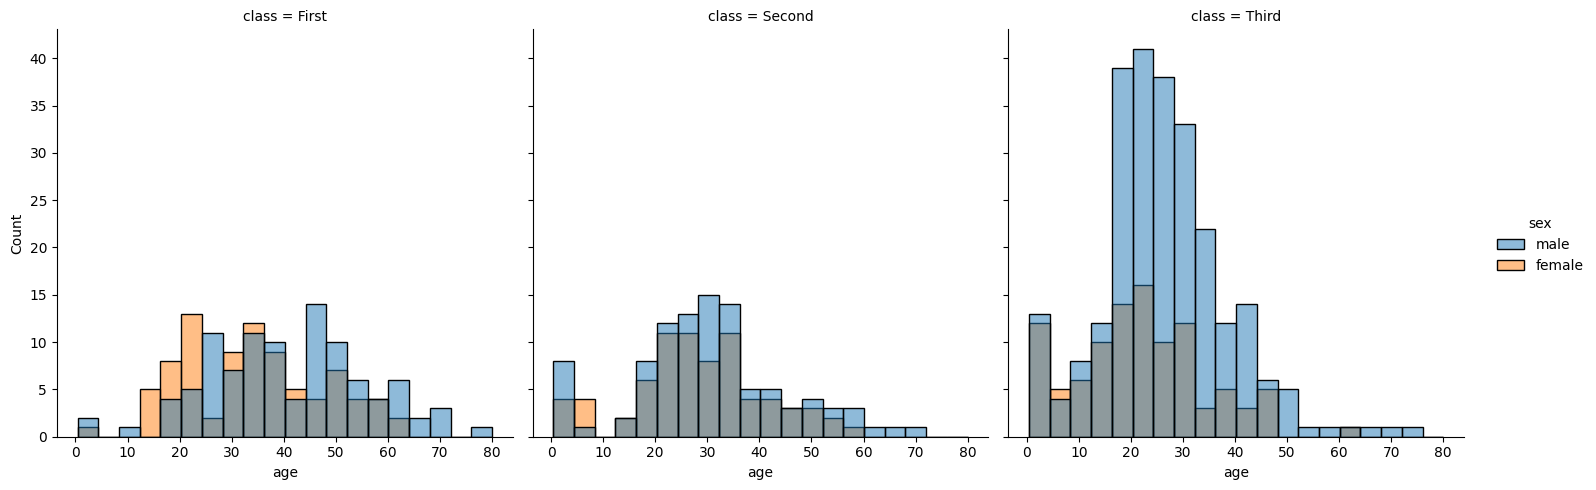

In [89]:
#facet

sns.displot(kind='hist',data=titanic,x='age',hue='sex',col='class')

<Axes: xlabel='total_bill', ylabel='tip'>

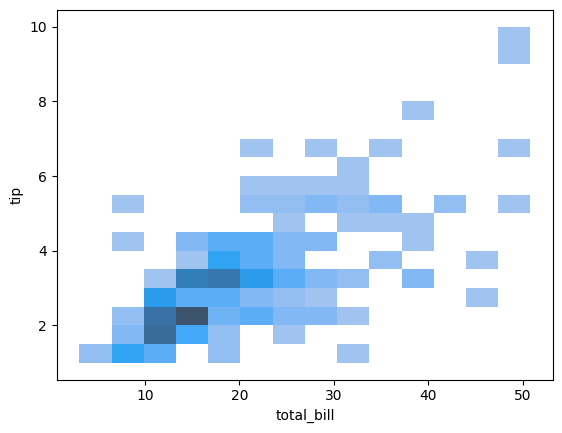

In [90]:
#2D histplot

sns.histplot(data=tips,x='total_bill',y='tip')

#### A Kernel Density Estimate (KDE) plot is a smooth, continuous probability density curve that estimates the distribution of a dataset. Unlike histograms, KDE plots do not rely on binning, offering a more precise view of the data distribution.

**Key Features:**
- Provides a smooth curve representing the data distribution.
- Useful for identifying multiple modes (peaks) in the data.
- Can be overlaid with other plots for enhanced analysis.

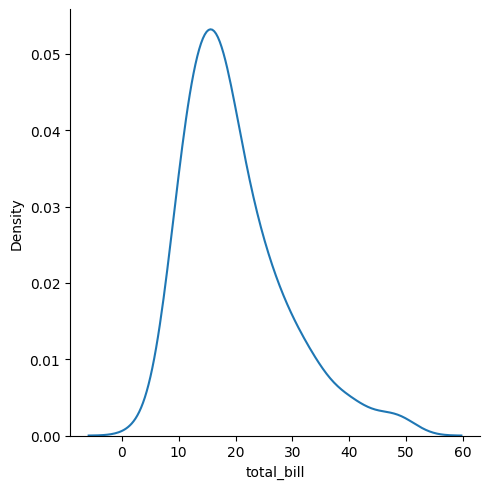

In [91]:
#kdeplot

sns.displot(data=tips,kind='kde',x='total_bill')

<Axes: xlabel='age', ylabel='Density'>

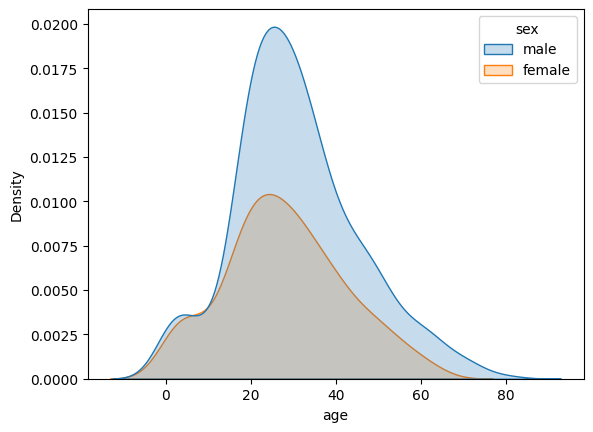

In [92]:
sns.kdeplot(data=titanic,x='age',hue='sex',fill=True)

<Axes: xlabel='total_bill', ylabel='tip'>

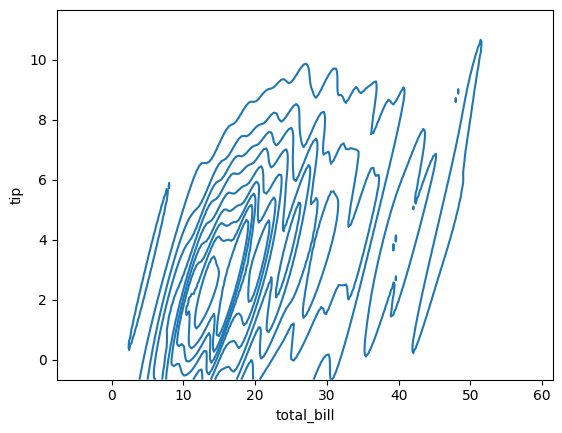

In [93]:

sns.kdeplot(data=tips,x='total_bill',y='tip')

#### A rug plot is a simple plot that marks each individual data point along an axis with a small tick mark. It's particularly useful for visualizing the distribution of a dataset in conjunction with other plot types.

**Key Features:**

- Displays individual data points for precise data inspection.
- Enhances other plots (like histograms or KDE plots) by showing exact data points.
- Useful for small to moderately sized datasets.

<Axes: xlabel='age', ylabel='Density'>

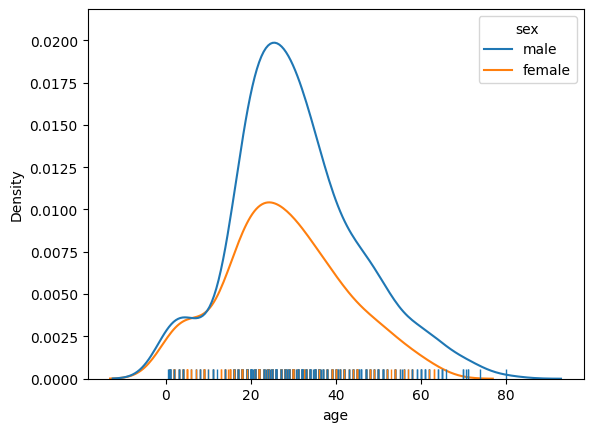

In [94]:
sns.kdeplot(data=titanic,x='age',hue='sex')
sns.rugplot(data=titanic,x='age',hue='sex')

## matrix plots

- Matrix plots in Seaborn are used to visualize data in a matrix format, where data is displayed as a grid of cells. Each cell's color or shading represents the value it holds. Matrix plots are particularly useful for visualizing relationships, correlations, or patterns in multi-dimensional data.

---------------------------------------------------------------------------------------------

- heatmap
- clustermap

#### **A heatmap** is a matrix plot where each cell's color represents the magnitude of a value. It’s commonly used to visualize correlations between variables, as well as other types of matrix-like data.

- Useful for visualizing correlations, confusion matrices, or any kind of matrix data where you want to see the intensity of values.

In [95]:
aux_df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

<Axes: xlabel='year', ylabel='country'>

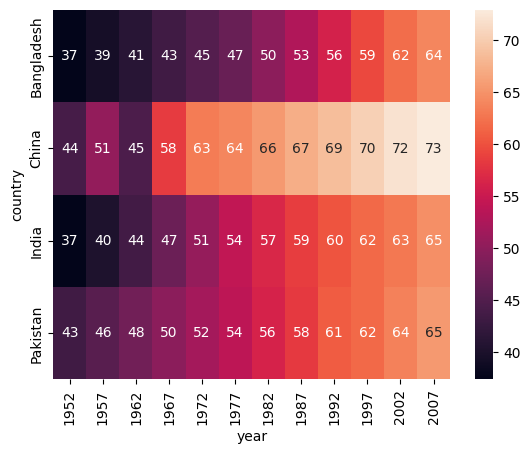

In [99]:
pivoted = aux_df.pivot(index='country',columns='year',values='lifeExp')
sns.heatmap(data=pivoted,cbar=True,annot=True)

#### **A clustermap** is a matrix plot that includes hierarchical clustering. It clusters both rows and columns to find similar groups, helping to identify patterns or groups within the data.

- Useful when you want to visualize the similarity between data points and variables, commonly used in bioinformatics for gene expression data, for example.

In [2]:
iris = sns.load_dataset('iris')

iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
27,5.2,3.5,1.5,0.2,setosa
123,6.3,2.7,4.9,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


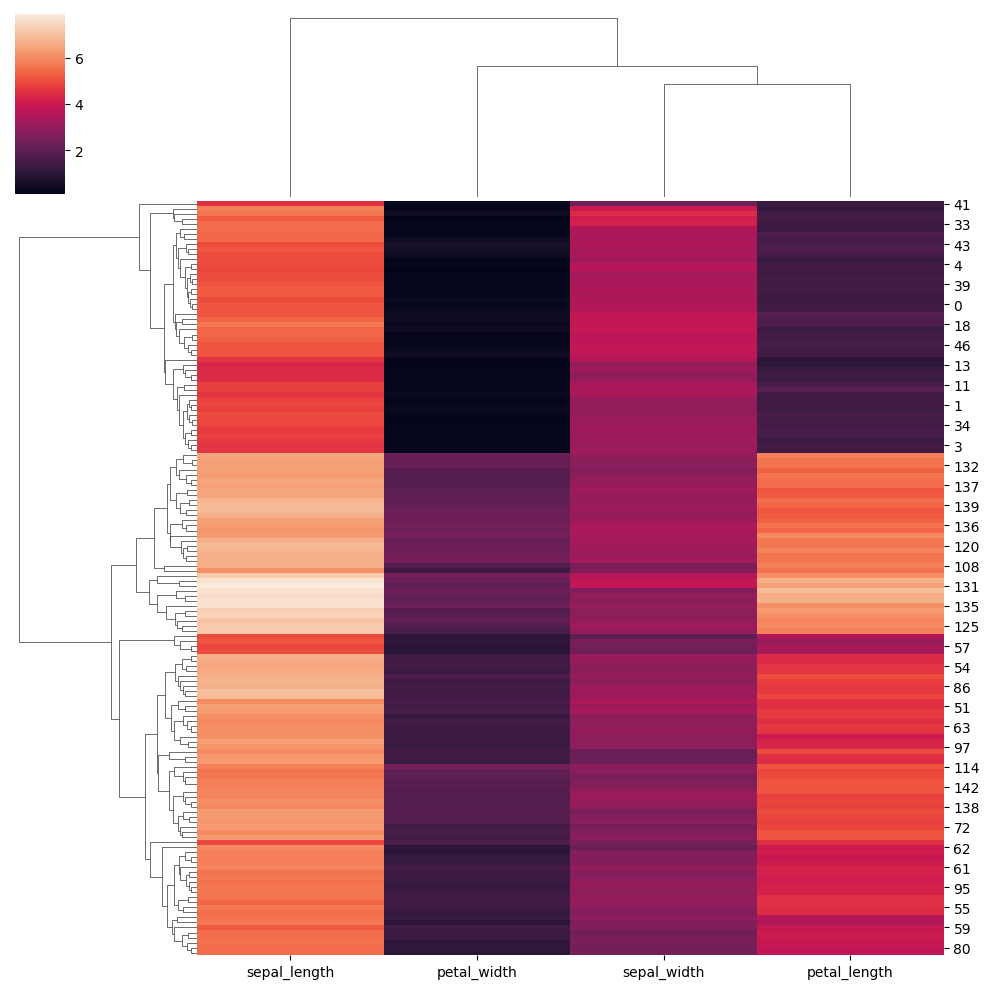

In [3]:
sns.clustermap(iris.iloc[:,[0,1,2,3]])

# categorical plots

## categorical scatter plots

- catplot
- stripplot
- swarmplot

#### **1. Strip Plot (stripplot)**
Purpose: Visualizes the one categorical and numerical data, used for bi variant analysis.

Description:
- A strip plot shows individual data points for each category.

- It's useful for seeing the spread of data and identifying outliers.

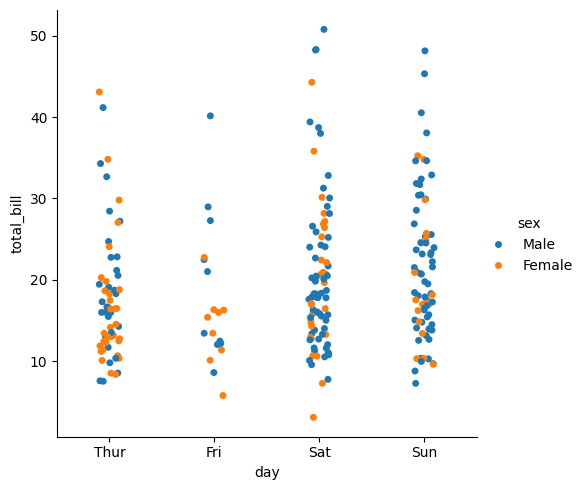

In [21]:
sns.catplot(kind='strip',data=tips,x='day',y='total_bill',hue = 'sex')

<Axes: xlabel='day', ylabel='total_bill'>

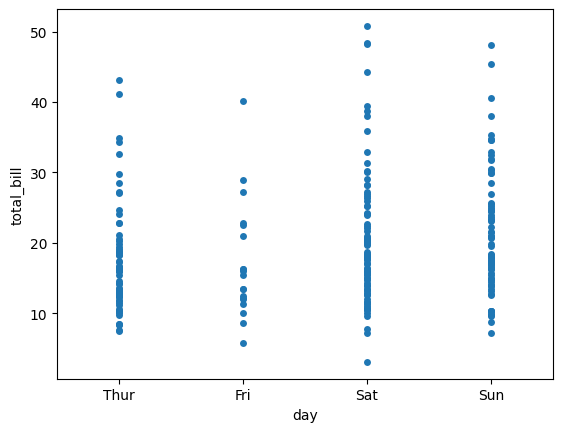

In [20]:
#jitter --> availbale in axes plot functions

sns.stripplot(data=tips,x='day',y='total_bill',jitter=False)

#### **2.Swarm Plot:**

Purpose: Similar to a strip plot but adjusts the points to avoid overlap.

Description:
- A swarm plot displays each data point for a categorical variable but avoids overlapping points, making it easier to see the distribution.

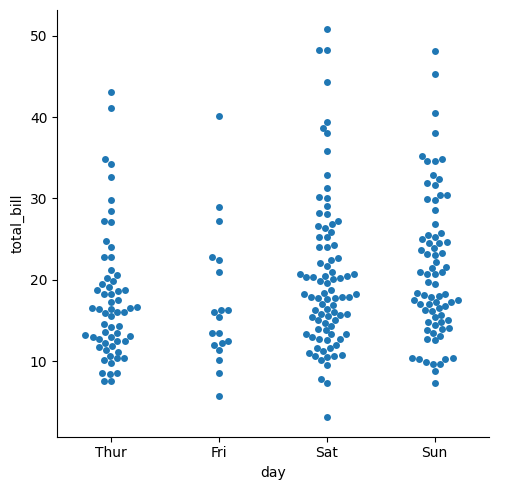

In [27]:
sns.catplot(kind='swarm',data=tips,x='day',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

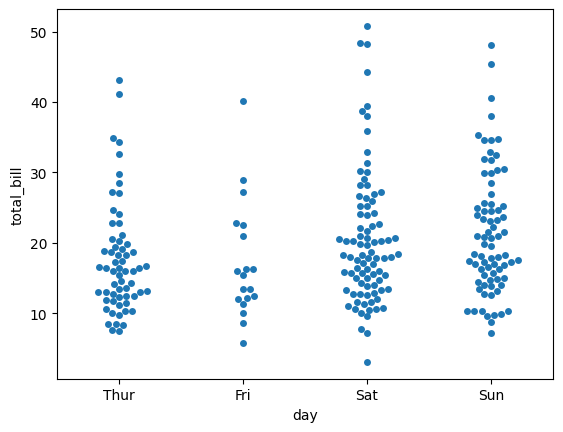

In [28]:
sns.swarmplot(data=tips,x='day',y='total_bill')

## categorical distribution plots

#### **1.Box Plot (boxplot)**
Purpose: Summarizes the distribution of a numerical variable across categories.
Description: 
- A box plot shows the median, quartiles, and potential outliers for each category. 
- It provides a quick summary of the data’s spread and central tendency.

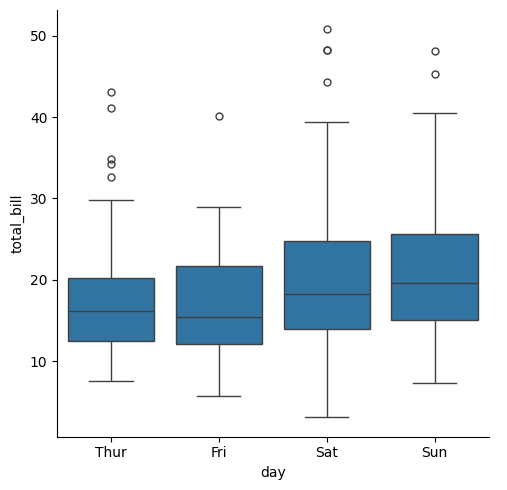

In [29]:
# fig level plot

sns.catplot(kind='box',data=tips,x='day',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

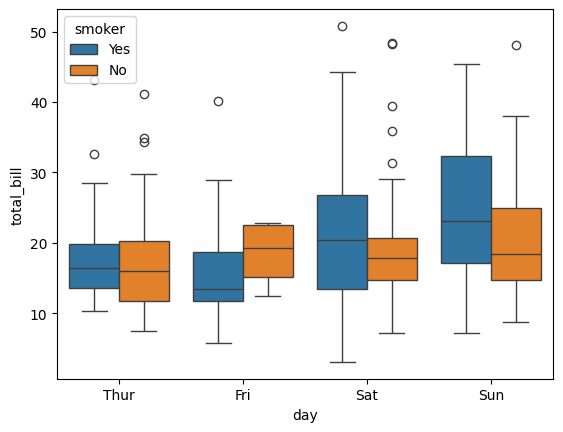

In [31]:
sns.boxplot(data=tips,x='day',y='total_bill',hue='smoker')

<Axes: ylabel='total_bill'>

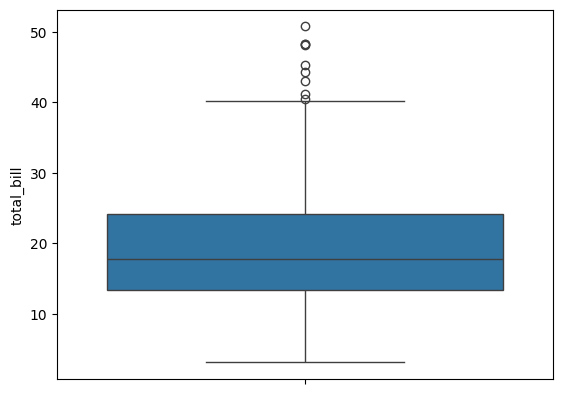

In [32]:
# single boxplot for a numerical column

sns.boxplot(data=tips,y='total_bill')

#### **2.Violin Plot (violinplot)**
Purpose: Combines aspects of a box plot and a kernel density plot.

Description: 
- A violin plot shows the distribution of the data across different categories, displaying both the density of the data and summary statistics (like in a box plot).

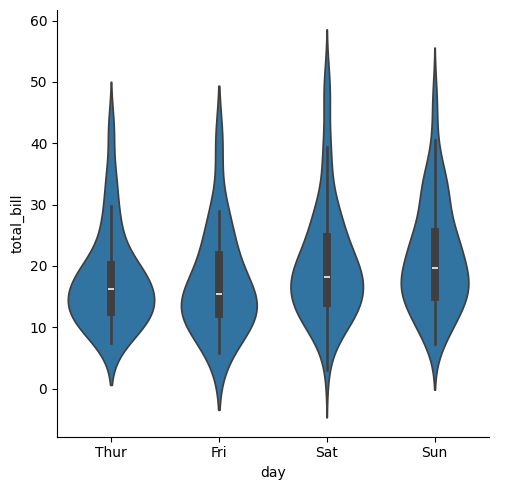

In [33]:
sns.catplot(kind='violin',data=tips,x='day',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

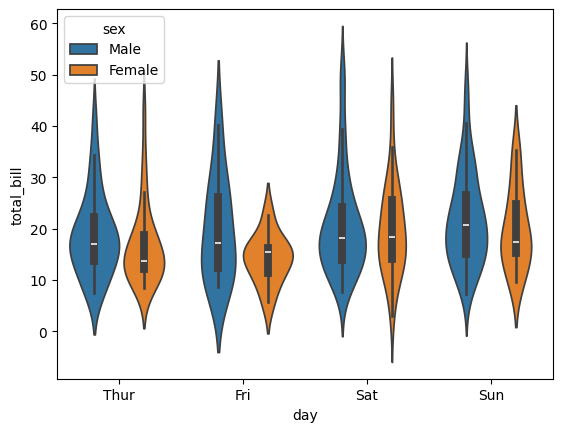

In [36]:
sns.violinplot(data=tips,x='day',y='total_bill',hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

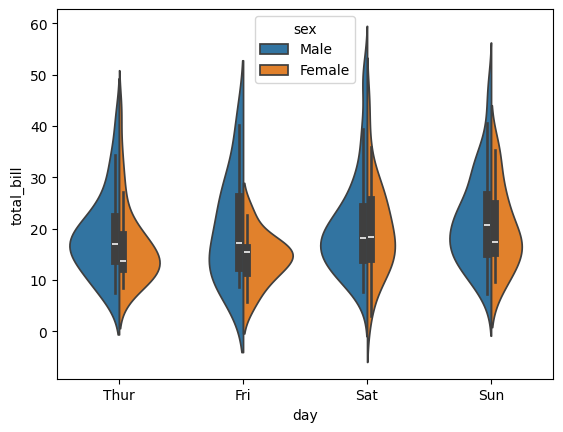

In [37]:
sns.violinplot(data=tips,x='day',y='total_bill',hue='sex',split=True)

## Categorical estimate plots



#### **1.Bar Plot**
Purpose: Displays the mean (or other estimator) of a numerical variable for each category.
Description: 
- A bar plot shows the average value of a variable for each category with error bars to indicate uncertainty.


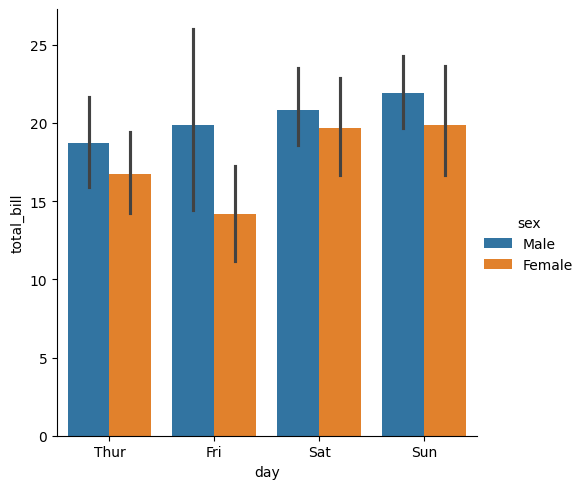

In [40]:
#fig level plot
sns.catplot(kind='bar',data=tips,x='day',y='total_bill',hue='sex')

<Axes: xlabel='sex', ylabel='total_bill'>

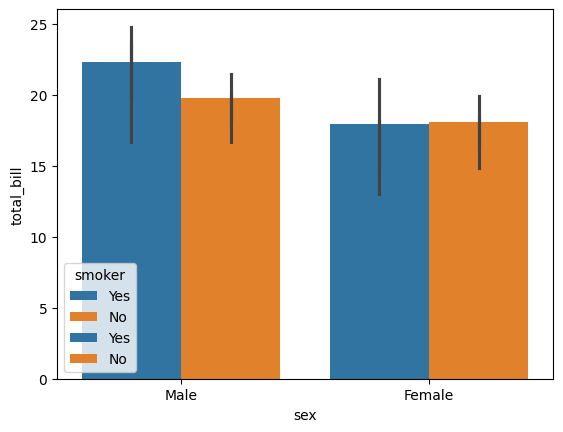

In [45]:
#axes level plots

sns.barplot(data=tips,x='sex',y='total_bill',hue='smoker')

#by default estimator will be mean

sns.barplot(data=tips,x='sex',y='total_bill',hue='smoker',estimator=np.median)

C:\Users\shiva\AppData\Local\Temp\ipykernel_21644\3941754171.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips,x='sex',y='total_bill',hue='smoker',estimator=np.median,ci=None)


<Axes: xlabel='sex', ylabel='total_bill'>

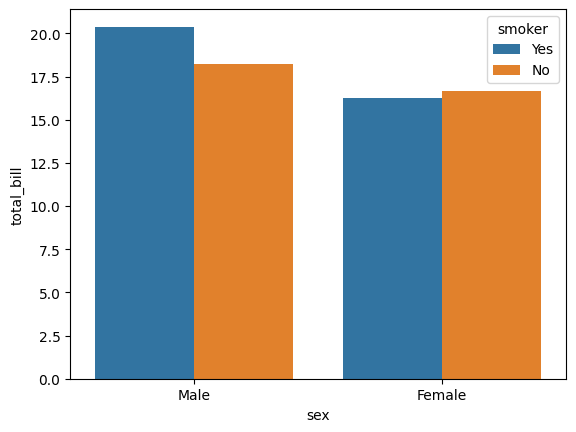

In [53]:
# remove error bars

sns.barplot(data=tips,x='sex',y='total_bill',hue='smoker',estimator=np.median,ci=None)

#### **2.Point Plot (pointplot)**:

Purpose: Visualizes changes in a numerical variable across categories.

Description: A point plot shows the mean (or other estimator) for each category, with lines connecting the points to highlight changes or trends.

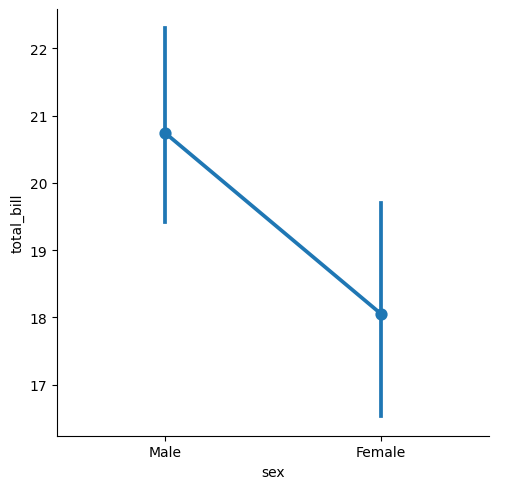

In [47]:
sns.catplot(kind='point',data=tips,x='sex',y='total_bill')

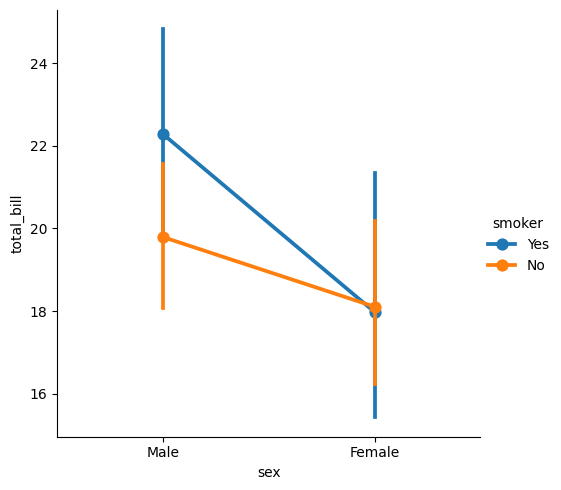

In [49]:
sns.catplot(kind='point',data=tips,x='sex',y='total_bill',hue='smoker')

<Axes: xlabel='sex', ylabel='total_bill'>

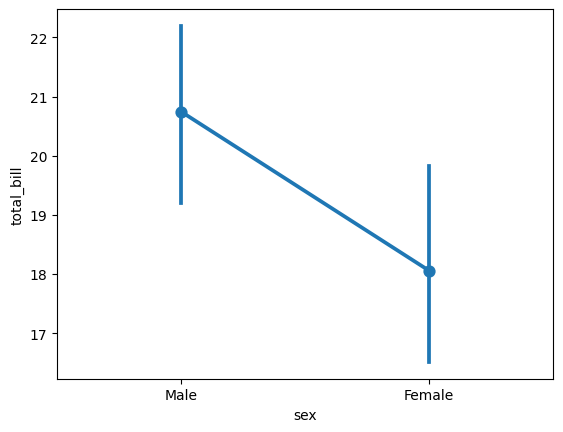

In [50]:
sns.pointplot(data=tips,x='sex',y='total_bill')

#### **3.count plot**

Purpose: Displays the count of observations for each category.(grpah for value_couont of a column)

Description: A count plot is a bar plot that shows the number of occurrences of each category in a dataset.

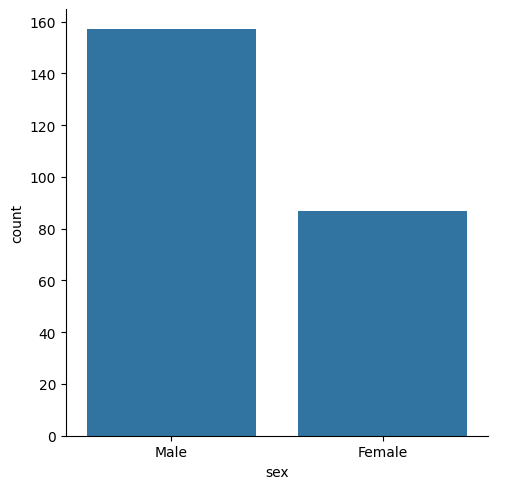

In [51]:
sns.catplot(kind='count',data=tips,x='sex')

<Axes: xlabel='sex', ylabel='count'>

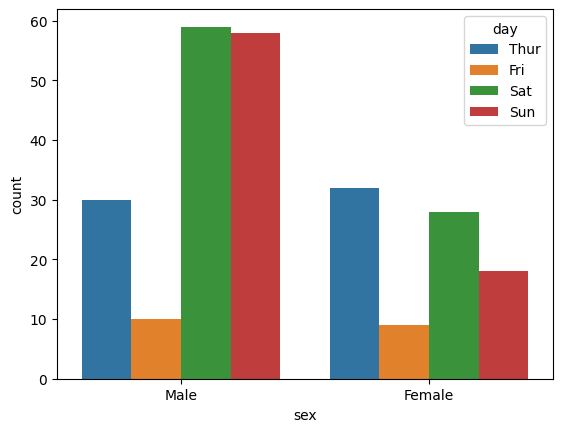

In [52]:
sns.countplot(data=tips,x='sex',hue='day')

## Regression plots

Seaborn provides several types of regression plots that help visualize the relationship between two variables, typically one numerical (continuous) and one independent variable. These plots are useful for exploring trends, correlations, and the fit of a linear regression model.


#### **1.lmplot**
Purpose: Visualizes the linear relationship between two variables with optional grouping by a categorical variable.

Description: lmplot is a powerful and flexible function for drawing linear regression models. It can plot regression lines with confidence intervals and handle multiple subplots (facets) for different levels of a categorical variable.

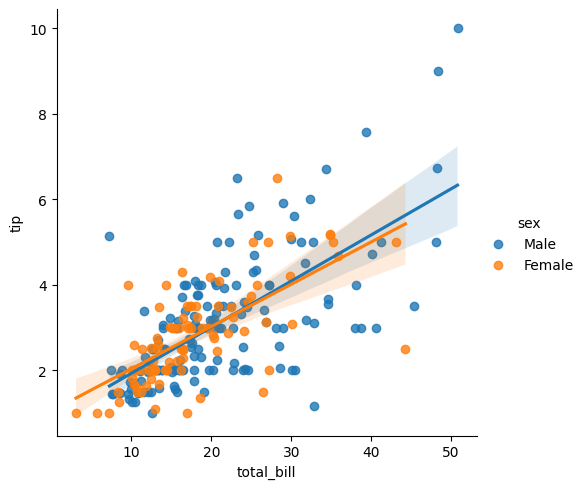

In [60]:
#lmplot has hue paramter
sns.lmplot(data=tips,x='total_bill',y='tip',hue='sex')

#### 2.**regplot**

Purpose: Creates a simple regression plot between two variables.
Description: 
- regplot is the most basic regression plot in Seaborn, suitable for quickly plotting a regression line with scatter points. 
- It's often used when you need a quick view of the relationship between two variables without additional complexity.


<Axes: xlabel='total_bill', ylabel='tip'>

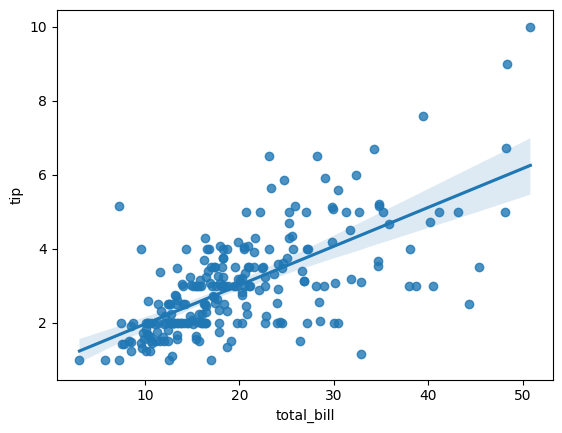

In [59]:

sns.regplot(data=tips,x='total_bill',y='tip')

#### **3.residplot**

Purpose: Visualizes the residuals (errors) of a regression model.

Description: 
- residplot is used to check the goodness-of-fit of a regression model by plotting the residuals (differences between observed and predicted values). 
- A good model will have residuals scattered randomly around the horizontal axis.

<Axes: xlabel='total_bill', ylabel='tip'>

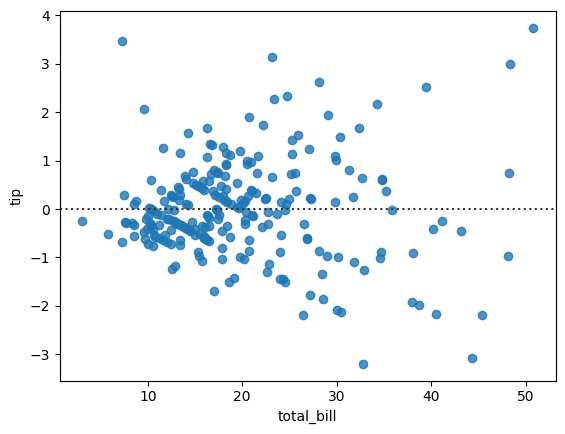

In [58]:
sns.residplot(data=tips,x='total_bill',y='tip')

## **FacetGrid in Seaborn**
- FacetGrid is a powerful tool in Seaborn that allows you to create multiple subplots (or "facets") based on the values of one or more categorical variables. 
- It's useful when you want to visualize the same plot across different subsets of your dataset. 
- For example, we might want to see how a certain relationship between two variables changes across different categories like gender, region, or time period.
- Highly Customizable: we can control the size of the grid, add titles, and adjust aesthetics.

##### Faceting by Rows and Columns: we can create a grid of plots by specifying one variable for rows and another for columns.

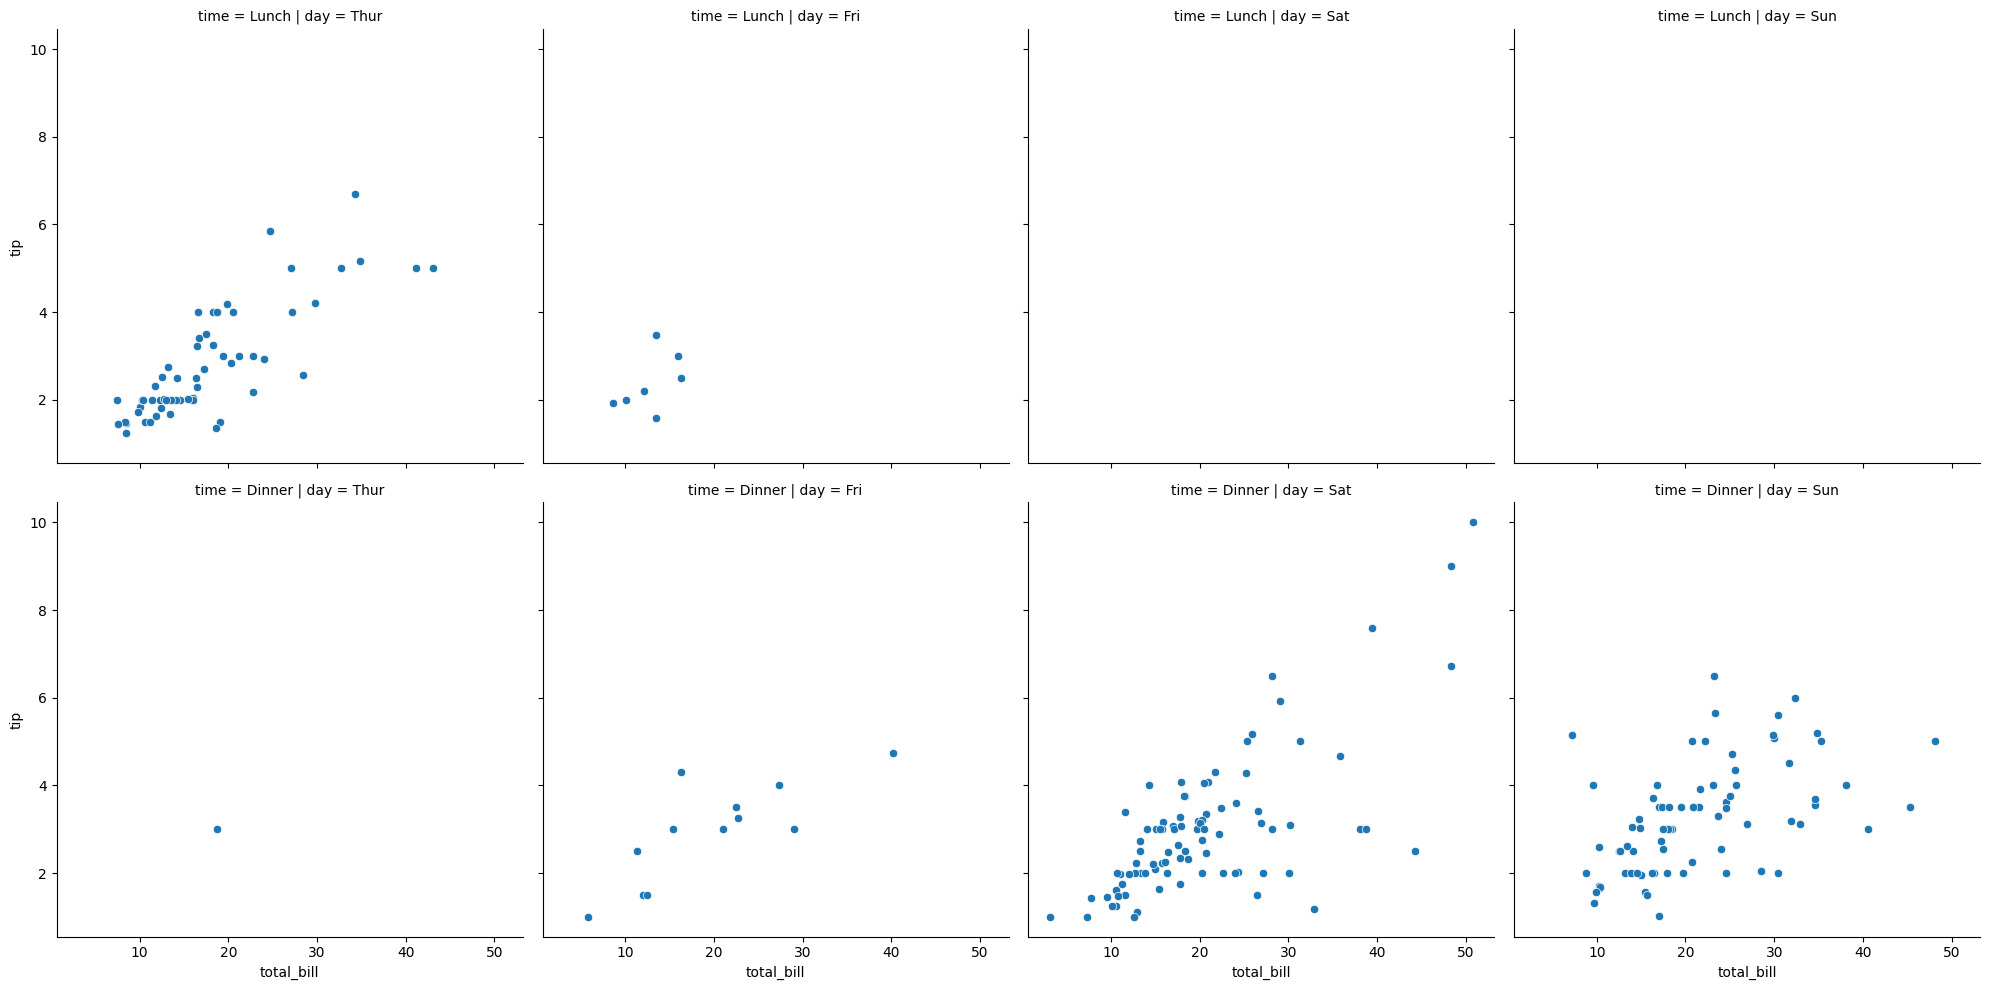

In [62]:
sns.relplot(kind='scatter',data=tips,x='total_bill',y='tip',col='day',row='time')

##### Faceting by Color (hue): Color the data points in each facet based on a third categorical variable.

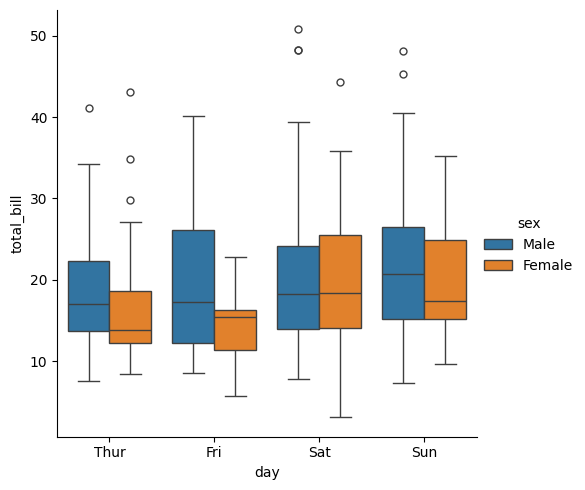

In [64]:
sns.catplot(kind='box',data=tips,y='total_bill',x='day',hue='sex')

##### Apply the Same Plot Type Across All Facets: Once the grid is created, you can apply a variety of plot types to all facets.

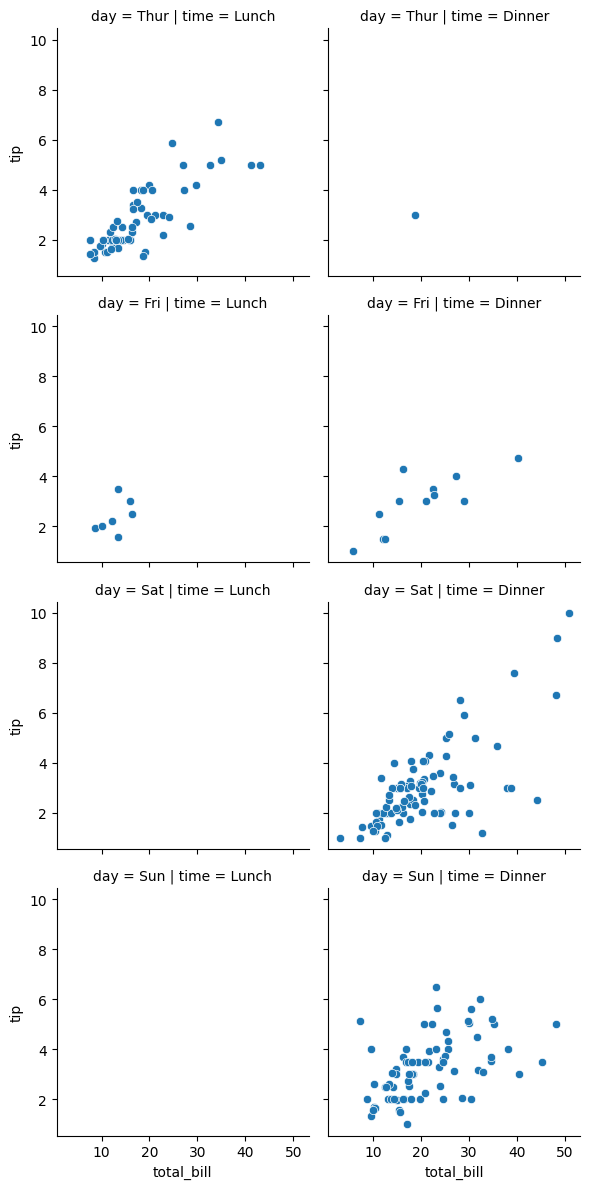

In [69]:
g = sns.FacetGrid(tips, col="time",  row="day")
g.map(sns.scatterplot, "total_bill", "tip")

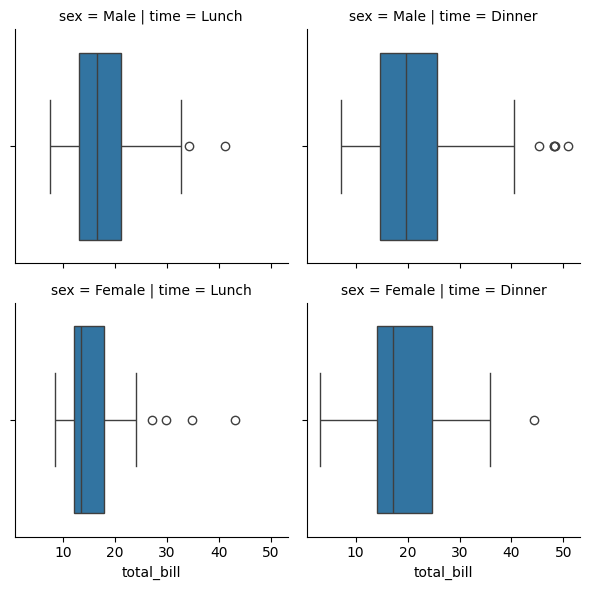

In [71]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.boxplot, x="total_bill")

## pairplot

- The pairplot function in Seaborn is a powerful tool for visualizing pairwise relationships in a dataset. 
- It creates a grid of plots, where each plot shows the relationship between two variables in the dataset. 
- The diagonal plots typically display the distribution of each variable (like histograms or KDEs), and the off-diagonal plots show scatter plots or regression plots between pairs of variables.

Key Features of pairplot:
- Pairwise Relationships: Visualizes relationships between all possible pairs of variables in the dataset.
- Diagonal Plots: Shows univariate distributions (e.g., histograms or KDEs) of each variable.
- Hue Parameter: Adds a categorical variable to distinguish data points by color.
Customization: Offers various options for customizing the plots, including different plot types for the off-diagonal and diagonal elements.

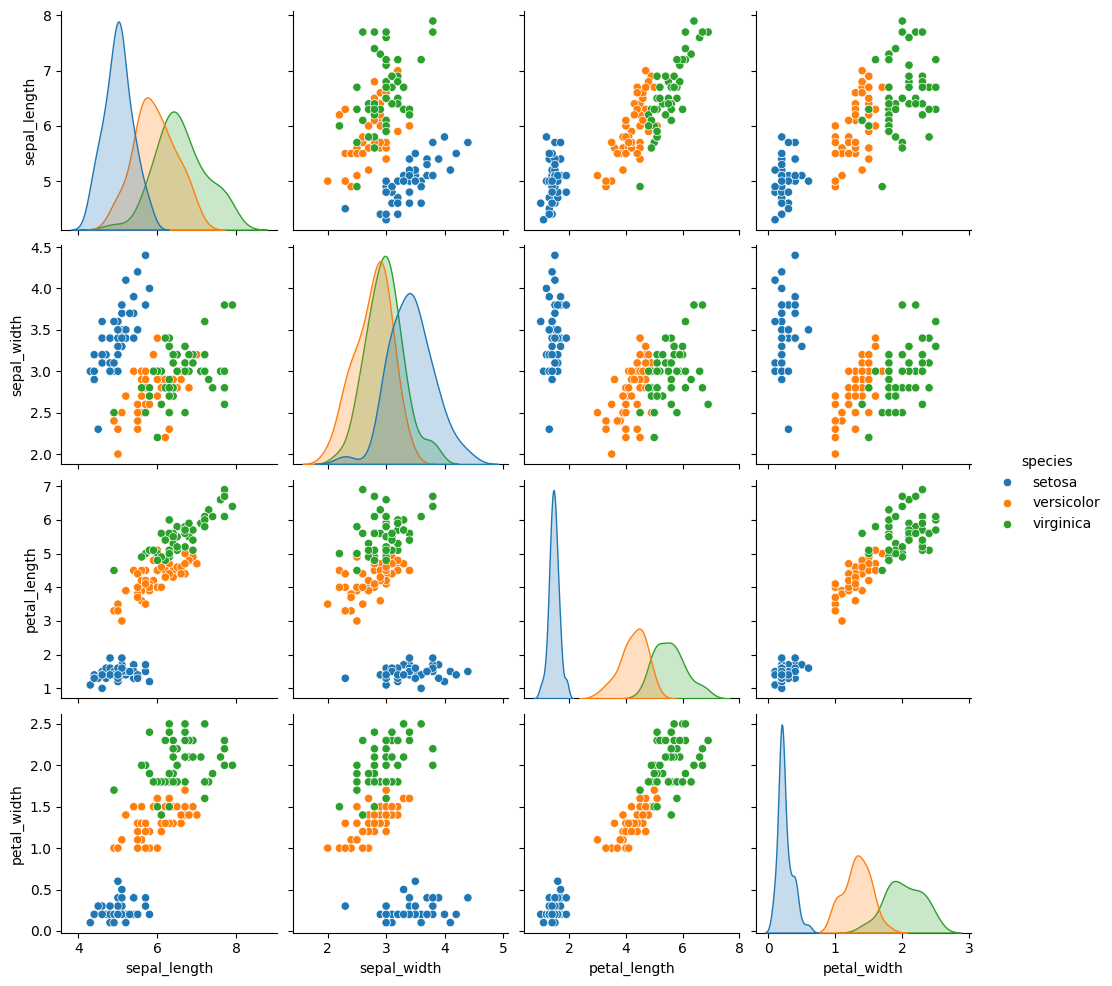

In [76]:
iris.columns
sns.pairplot(iris,hue='species')

## pairgrid

- PairGrid is a more customizable and flexible version of pairplot in Seaborn. 
- While pairplot is a high-level function that quickly creates a grid of plots showing pairwise relationships between variables, PairGrid allows for more detailed customization. 
- we can control what kind of plots appear on the diagonal, off-diagonal, and even along the axes. 
- map_diag is used to control what appears on the diagonal (usually univariate distributions).
- map_offdiag is used to control what appears off-diagonal (usually bivariate relationships).

This makes PairGrid ideal for complex visualizations where we need more control over each aspect of the plot.



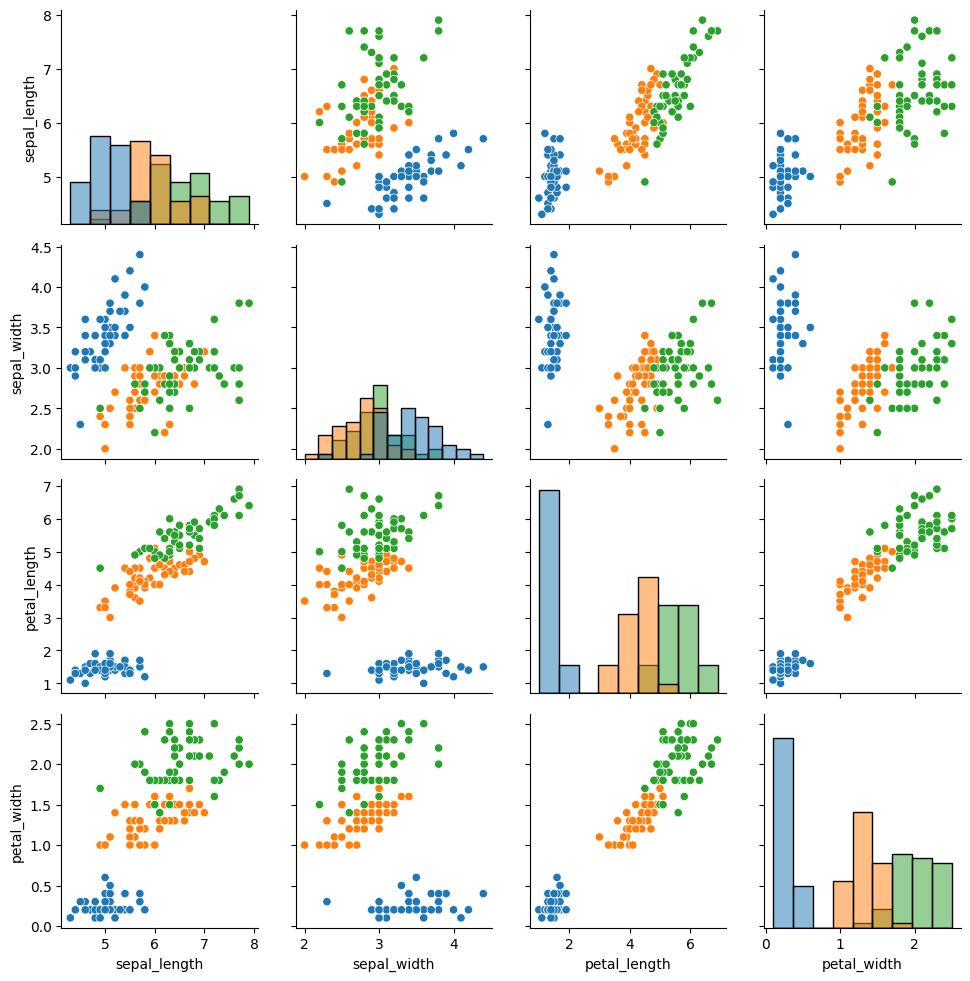

In [82]:
g = sns.PairGrid(data=iris,hue='species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

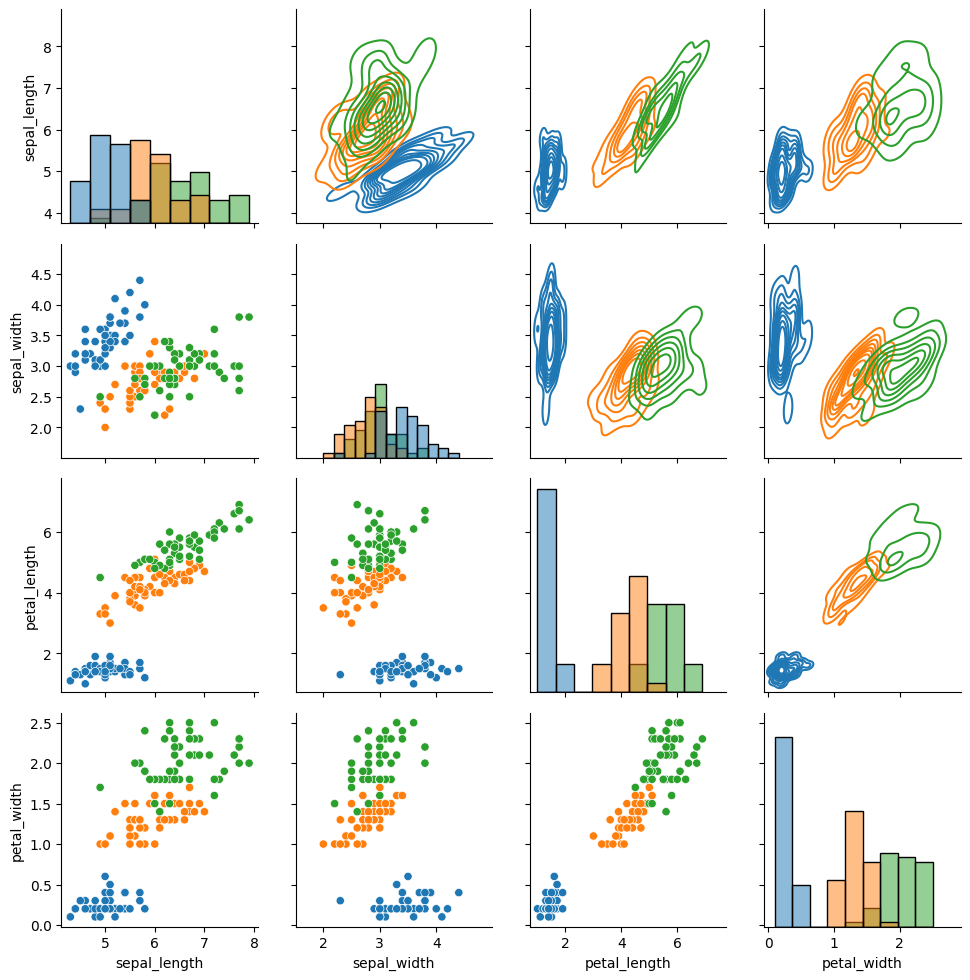

In [84]:
g = sns.PairGrid(iris,hue='species')
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)


## jointplot and jointGrid

#### **jointplot**
jointplot is a convenient, high-level function that combines scatter plots (or other bivariate plots) with univariate plots (like histograms or KDEs) on the margins. It’s perfect for quickly visualizing how two variables relate to each other and what their individual distributions look like.

Key Features:

- Bivariate plot in the center: Shows the relationship between two variables (default is a scatter plot).
- Univariate plots on the margins: Shows the distribution of each variable along the x and y axes.
- Customizable plot types: You can change the types of plots used for both the bivariate and univariate visualizations.

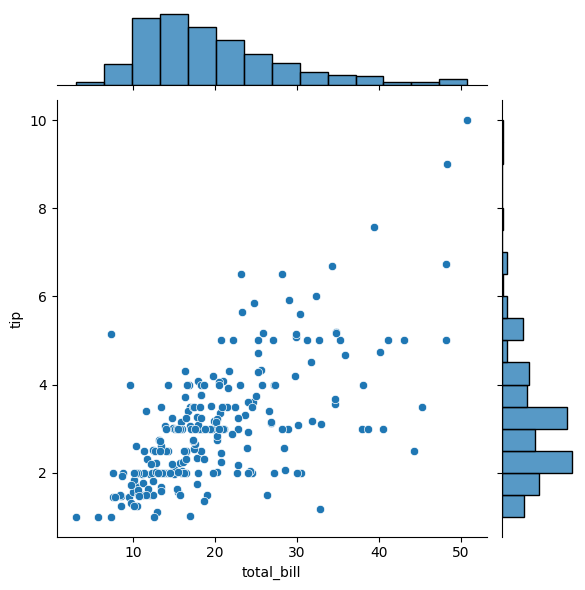

In [85]:
sns.jointplot(data=tips,x='total_bill',y='tip',kind='scatter')

#kind = ['hist'|'scatter'|'reg'|'residual'|'hex'|'kde']

#### jointGrid

JointGrid is the underlying class that powers jointplot, offering more control and flexibility. 

It allows you to customize the different components of the plot—such as the main plot, marginal plots, and even the annotations—in a more granular way.

Key Features:

- Complete Control: Unlike jointplot, JointGrid lets you customize the plots in the center and on the margins separately.
- Flexible Mapping: You can map different plotting functions to the main plot and marginal plots, giving you more creative control.
- Add Layers: You can add multiple layers of plots (e.g., a scatter plot with a KDE overlay) using JointGrid.

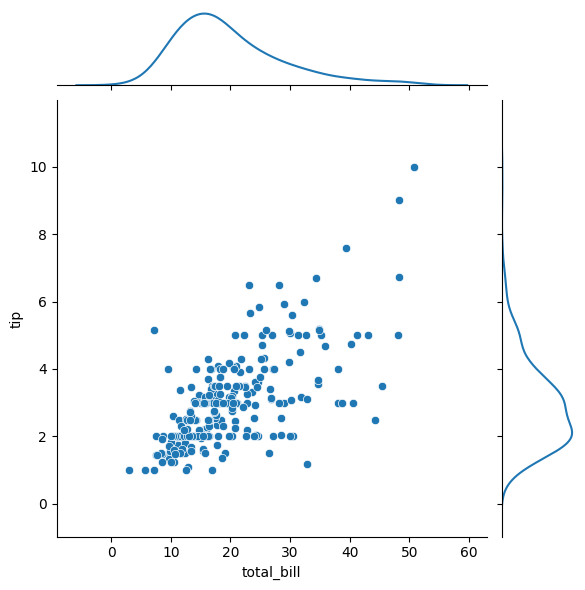

In [88]:
g = sns.JointGrid(data=tips,x='total_bill',y='tip')
g.plot(sns.scatterplot,sns.kdeplot)

## utility functions

In [93]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [95]:
df = sns.load_dataset('dowjones')
df.sample(5)


,Date,Price
144,1926-12-01,159.30
589,1964-01-01,776.62
59,1919-11-01,111.60
88,1922-04-01,91.30
28,1917-04-01,93.90
